In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')


In [7]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [8]:
# check all values in Churned colum is 0 or 1
df.loc[(df['Churned'] != 0) & (df['Churned'] != 1)]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn


In [9]:
# Check whether there's any missing Date_of_Churn data for Churned==1 rows
unchurned_items = df.loc[df['Churned'] == 0]
unchurned_items.loc[unchurned_items['Date_of_Churn'] == None]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn


In [10]:
# Check whether there's any missing Reason_for_Churn data for Churned==1 rows
unchurned_items = df.loc[df['Churned'] == 0]
unchurned_items.loc[unchurned_items['Reason_for_Churn'] == None]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn


In [127]:
# Calculate the count of each reason for churn
reasons_for_churn_count = df['Reason_for_Churn'].value_counts().reset_index()
reasons_for_churn_count.columns = ['Reason_for_Churn', 'Count']

# Print out the reasons for churn and their counts
print("Reasons for Churn and Their Counts:")
print(reasons_for_churn_count)

Reasons for Churn and Their Counts:
            Reason_for_Churn  Count
0             Price increase     68
1       Found better service     64
2           Personal reasons     62
3  Dissatisfied with content     52


In [18]:
age_distribution = df['Age'].describe()

print("Age Distribution:")
print(age_distribution)

Age Distribution:
count    1000.000000
mean       44.385000
std        15.321669
min        18.000000
25%        31.750000
50%        45.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


Churn Rate by Age:
    Age   Churned
0    18  0.291667
1    19  0.300000
2    20  0.200000
3    21  0.333333
4    22  0.173913
5    23  0.266667
6    24  0.230769
7    25  0.190476
8    26  0.352941
9    27  0.428571
10   28  0.250000
11   29  0.380952
12   30  0.187500
13   31  0.133333
14   32  0.133333
15   33  0.238095
16   34  0.300000
17   35  0.357143
18   36  0.444444
19   37  0.571429
20   38  0.333333
21   39  0.444444
22   40  0.095238
23   41  0.363636
24   42  0.238095
25   43  0.269231
26   44  0.312500
27   45  0.111111
28   46  0.105263
29   47  0.166667
30   48  0.307692
31   49  0.120000
32   50  0.111111
33   51  0.312500
34   52  0.222222
35   53  0.350000
36   54  0.045455
37   55  0.307692
38   56  0.173913
39   57  0.133333
40   58  0.187500
41   59  0.312500
42   60  0.000000
43   61  0.315789
44   62  0.150000
45   63  0.250000
46   64  0.200000
47   65  0.380952
48   66  0.192308
49   67  0.250000
50   68  0.380952
51   69  0.285714
52   70  0.130435

Average 

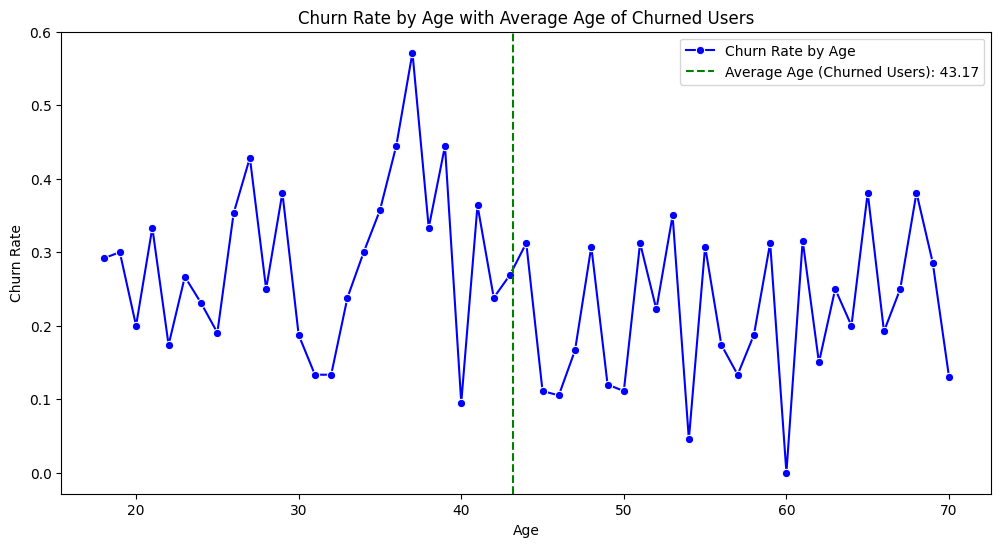

In [97]:
# Calculate churn rate by age
churn_rate_by_age = df.groupby('Age')['Churned'].mean().reset_index()

# Calculate average age for churned users
average_age_churned = df[df['Churned'] == 1]['Age'].mean()

# Print out the churn rate by age
print("Churn Rate by Age:")
print(churn_rate_by_age)

# Print out the average age for churned users
print(f"\nAverage Age for Churned Users: {average_age_churned:.2f}")

# Plot the churn rate by age with the average age for churned users
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Churned', data=churn_rate_by_age, marker='o', color='b', label='Churn Rate by Age')
plt.axvline(x=average_age_churned, color='g', linestyle='--', label=f'Average Age (Churned Users): {average_age_churned:.2f}')
plt.title('Churn Rate by Age with Average Age of Churned Users')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.legend()
plt.show()

In [21]:
location_distribution = df['Location'].value_counts()
print("\nLocation Distribution:")
print(location_distribution)


Location Distribution:
Location
West       216
North      204
Central    201
East       200
South      179
Name: count, dtype: int64


Churn Rate by Location:
  Location   Churned
0  Central  0.233831
1     East  0.300000
2    North  0.259804
3    South  0.234637
4     West  0.203704

Overall Average Churn Rate: 24.60%


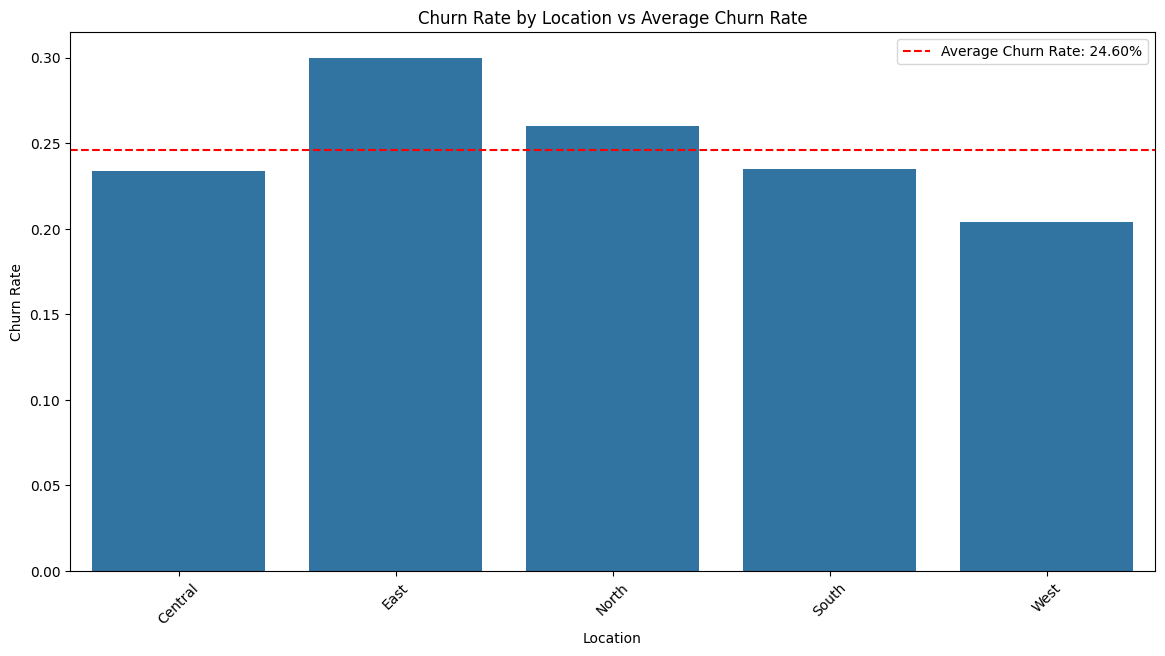

In [99]:
# Calculate churn rate by location
churn_rate_by_location = df.groupby('Location')['Churned'].mean().reset_index()

# Calculate overall average churn rate
average_churn_rate = df['Churned'].mean()

# Print out the churn rate by location
print("Churn Rate by Location:")
print(churn_rate_by_location)

# Print out the overall average churn rate
print(f"\nOverall Average Churn Rate: {average_churn_rate:.2%}")

# Plot the churn rate by location with the average churn rate
plt.figure(figsize=(14, 7))
sns.barplot(x='Location', y='Churned', data=churn_rate_by_location)
plt.axhline(y=average_churn_rate, color='r', linestyle='--', label=f'Average Churn Rate: {average_churn_rate:.2%}')
plt.title('Churn Rate by Location vs Average Churn Rate')
plt.xlabel('Location')
plt.ylabel('Churn Rate')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Average Rating by Location:
  Location  Rating_Given
0  Central      3.119403
1     East      2.940000
2    North      3.088235
3    South      2.966480
4     West      3.027778

Overall Average Rating: 3.03


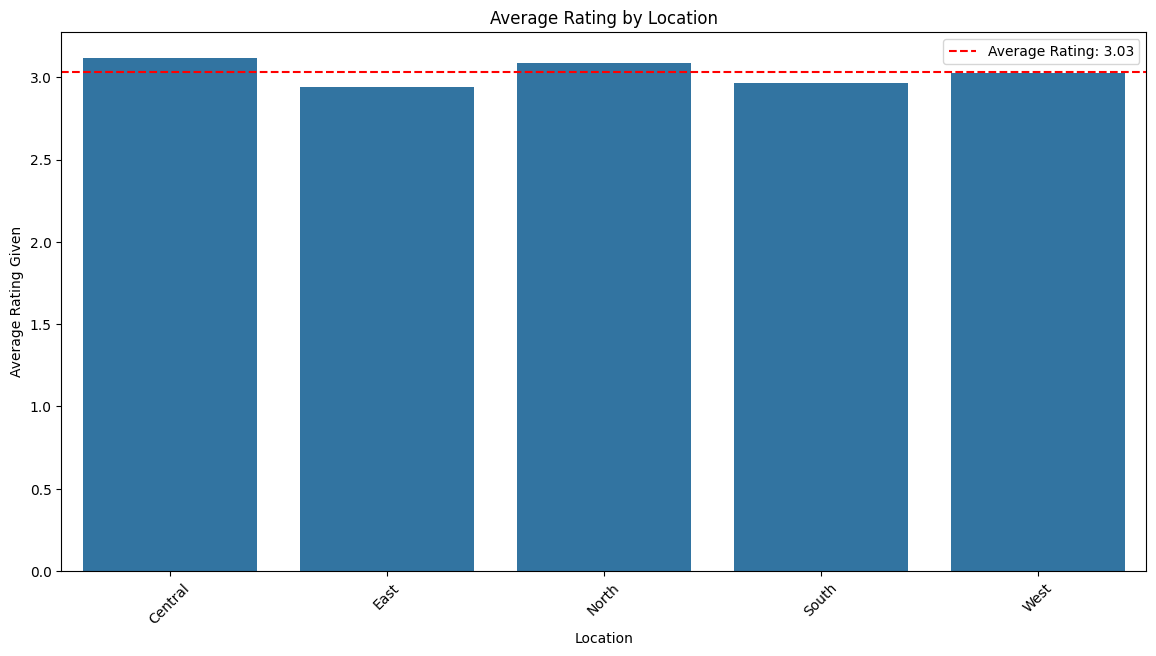

In [104]:
# Calculate average rating by location
rating_by_location = df.groupby('Location')['Rating_Given'].mean().reset_index()

# Calculate the overall average rating
average_rating = df['Rating_Given'].mean()

# Print out the average rating by location
print("Average Rating by Location:")
print(rating_by_location)

# Print out the overall average rating
print(f"\nOverall Average Rating: {average_rating:.2f}")

# Plot the average rating by location with the overall average rating
plt.figure(figsize=(14, 7))
sns.barplot(x='Location', y='Rating_Given', data=rating_by_location)
plt.axhline(y=average_rating, color='r', linestyle='--', label=f'Average Rating: {average_rating:.2f}')
plt.title('Average Rating by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating Given')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Count of Reasons for Churn by Location and Devices Used:
Reason_for_Churn       Dissatisfied with content  Found better service  \
Location Devices_Used                                                    
Central  Mobile                              6.0                   6.0   
         PC                                  1.0                   1.0   
         TV                                  2.0                   1.0   
         Tablet                              1.0                   3.0   
East     Mobile                              7.0                  13.0   
         PC                                  0.0                   1.0   
         TV                                  3.0                   2.0   
         Tablet                              2.0                   2.0   
North    Mobile                              4.0                   7.0   
         PC                                  0.0                   1.0   
         TV                                  2.0       

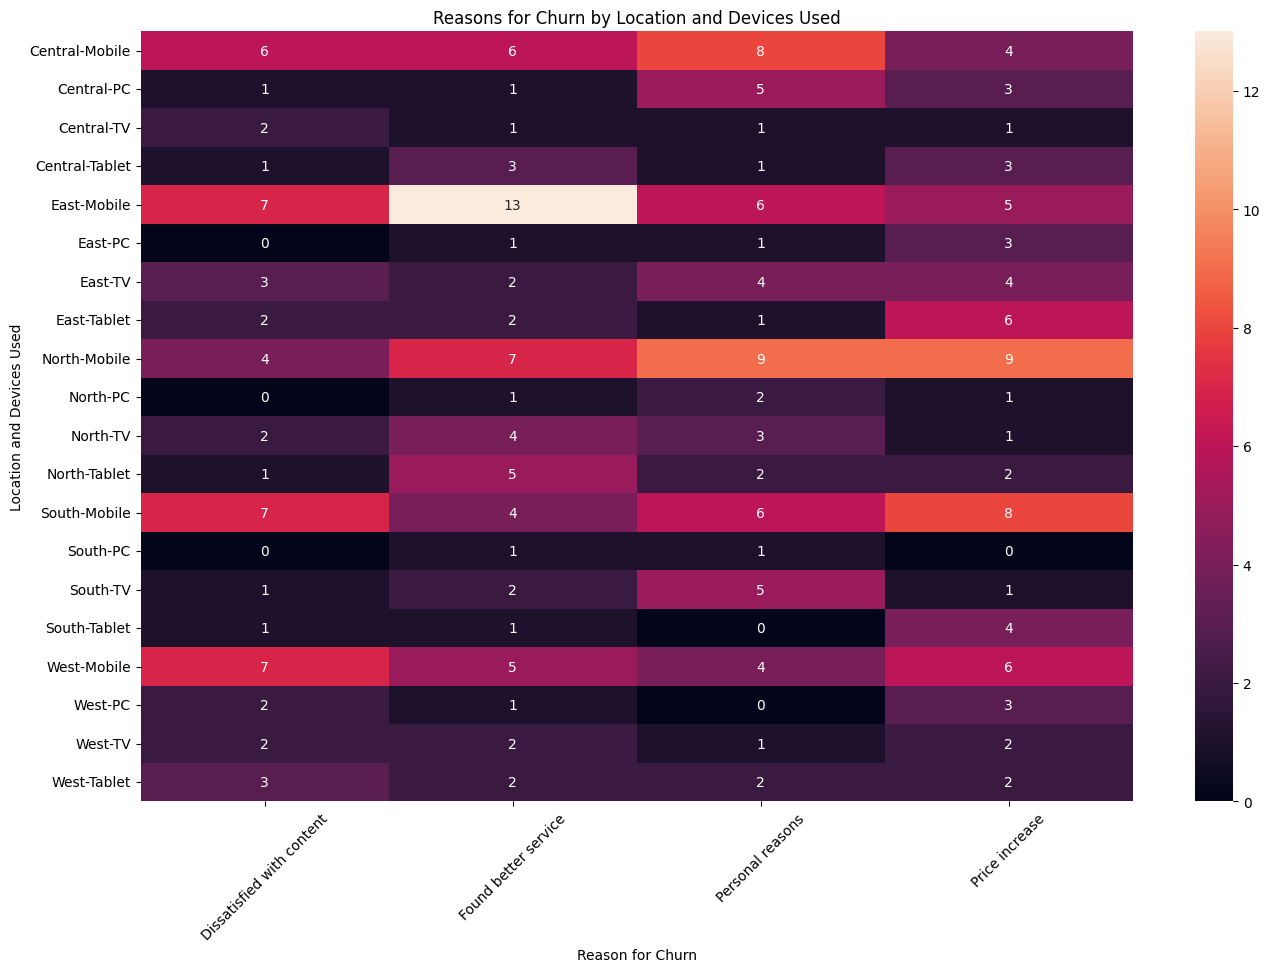

In [110]:
# Group the data by location, devices used, and reason for churn and calculate the count
grouped_data = churned_data.groupby(['Location', 'Devices_Used', 'Reason_for_Churn']).size().reset_index(name='Count')

# Create a pivot table for better visualization
pivot_table = grouped_data.pivot_table(index=['Location', 'Devices_Used'], columns='Reason_for_Churn', values='Count', fill_value=0)

# Print out the pivot table
print("Count of Reasons for Churn by Location and Devices Used:")
print(pivot_table)

# Plot the data using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f')
plt.title('Reasons for Churn by Location and Devices Used')
plt.xlabel('Reason for Churn')
plt.ylabel('Location and Devices Used')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [117]:
# Calculate the descriptive statistics for monthly payment by location and subscription type
payment_stats = df.groupby(['Location', 'Subscription_Type'])['Monthly_Payment'].describe()

# Print out the results
print("Monthly Payment by Location and Subscription Type:")
print(payment_stats)



Monthly Payment by Location and Subscription Type:
                            count   mean           std    min    25%    50%  \
Location Subscription_Type                                                    
Central  Basic               61.0   9.99  1.791099e-15   9.99   9.99   9.99   
         Premium             41.0  19.99  0.000000e+00  19.99  19.99  19.99   
         Standard            99.0  14.99  1.785397e-15  14.99  14.99  14.99   
East     Basic               42.0   9.99  0.000000e+00   9.99   9.99   9.99   
         Premium             44.0  19.99  0.000000e+00  19.99  19.99  19.99   
         Standard           114.0  14.99  3.568399e-15  14.99  14.99  14.99   
North    Basic               56.0   9.99  0.000000e+00   9.99   9.99   9.99   
         Premium             39.0  19.99  3.599156e-15  19.99  19.99  19.99   
         Standard           109.0  14.99  1.784562e-15  14.99  14.99  14.99   
South    Basic               58.0   9.99  1.791871e-15   9.99   9.99   9.99   
 

Average Session Length by Device:
  Devices_Used  Average_Session_Length
0       Mobile                1.900117
1           PC                1.867377
2           TV                1.863172
3       Tablet                1.931348


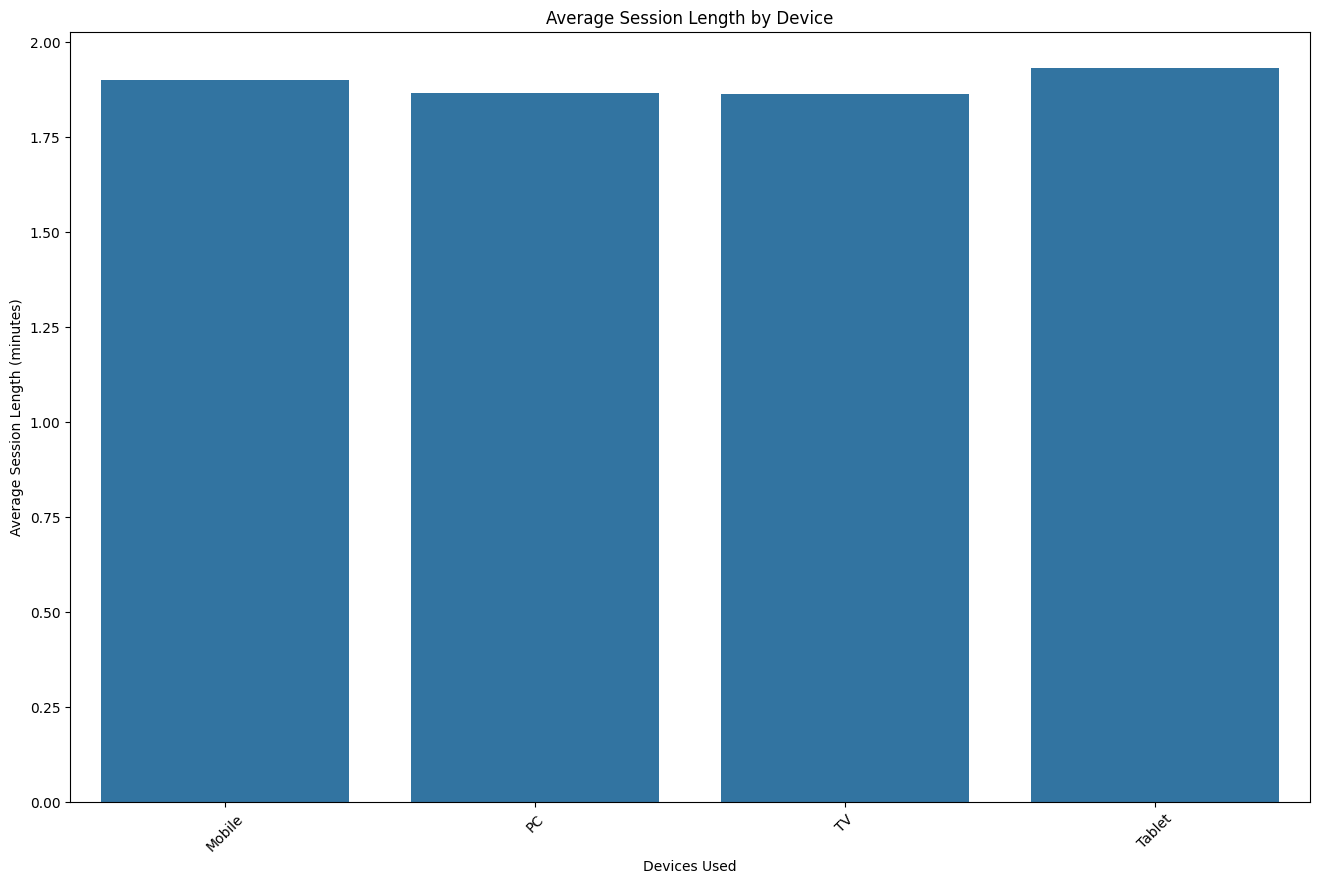

In [122]:
# Calculate the mean average session length by device
avg_session_by_device = df.groupby('Devices_Used')['Average_Session_Length'].mean().reset_index()

# Print out the results
print("Average Session Length by Device:")
print(avg_session_by_device)

# Plot the average session length by device
plt.figure(figsize=(16, 10))
sns.barplot(x='Devices_Used', y='Average_Session_Length', data=avg_session_by_device)
plt.title('Average Session Length by Device')
plt.xlabel('Devices Used')
plt.ylabel('Average Session Length (minutes)')
plt.xticks(rotation=45)
plt.show()

Monthly Hours Watched by Device:
  Devices_Used  Monthly_Hours_Watched
0       Mobile              18.300548
1           PC              18.305672
2           TV              19.758769
3       Tablet              20.499218


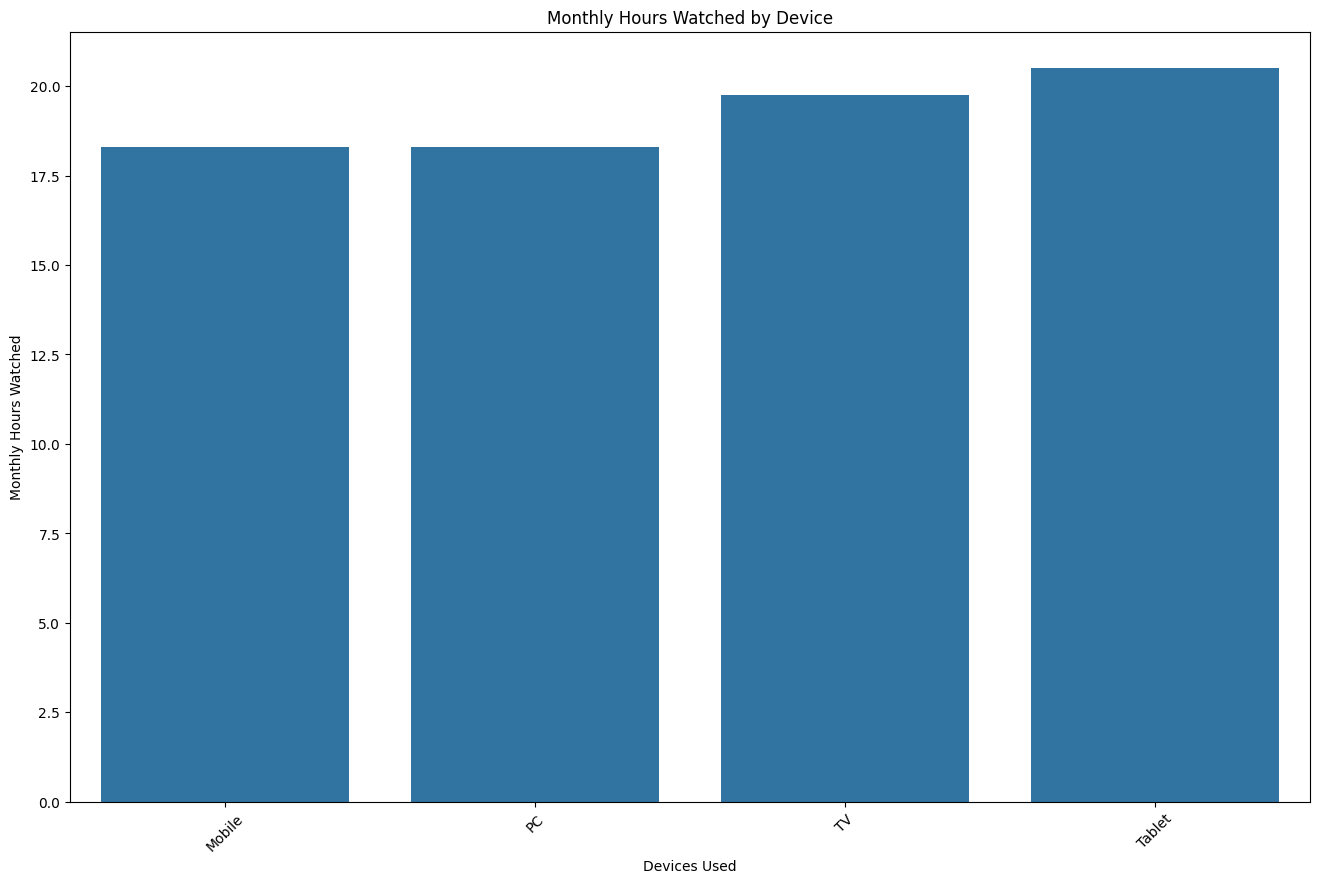

In [121]:
# Calculate the mean monthly hours watched by device
monthly_hours_by_device = df.groupby('Devices_Used')['Monthly_Hours_Watched'].mean().reset_index()

# Print out the results
print("Monthly Hours Watched by Device:")
print(monthly_hours_by_device)

# Plot the monthly hours watched by device
plt.figure(figsize=(16, 10))
sns.barplot(x='Devices_Used', y='Monthly_Hours_Watched', data=monthly_hours_by_device)
plt.title('Monthly Hours Watched by Device')
plt.xlabel('Devices Used')
plt.ylabel('Monthly Hours Watched')
plt.xticks(rotation=45)
plt.show()

Mean Subscription Duration by Reason for Churn:
            Reason_for_Churn  Subscription_Duration
0  Dissatisfied with content             188.038462
1       Found better service             197.656250
2           Personal reasons             188.951613
3             Price increase             204.632353

Overall Mean Subscription Duration: 195.36 days


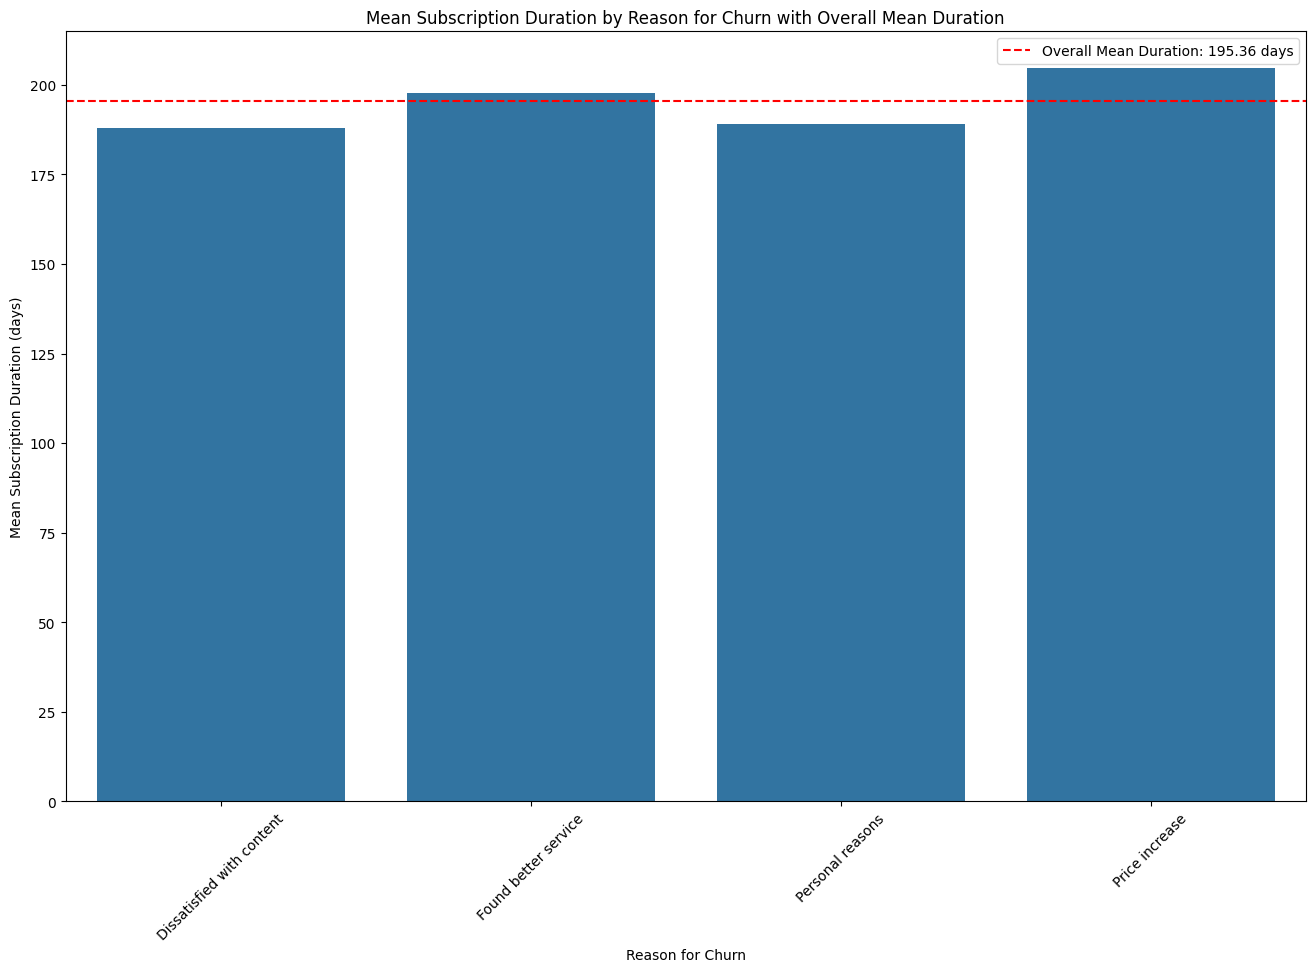

In [136]:
# Convert date columns to datetime
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

# Add column for subscription duration in days
df['Subscription_Duration'] = (df['Date_of_Churn'] - df['Subscription_Start_Date']).dt.days

# Calculate the overall mean subscription duration
overall_mean_duration = df['Subscription_Duration'].mean()

# Calculate the mean subscription duration by reason for churn
duration_by_reason = df.groupby('Reason_for_Churn')['Subscription_Duration'].mean().reset_index()

# Print out the results
print("Mean Subscription Duration by Reason for Churn:")
print(duration_by_reason)
print(f"\nOverall Mean Subscription Duration: {overall_mean_duration:.2f} days")

# Plot the mean subscription duration by reason for churn with the overall mean duration
plt.figure(figsize=(16, 10))
sns.barplot(x='Reason_for_Churn', y='Subscription_Duration', data=duration_by_reason)
plt.axhline(y=overall_mean_duration, color='r', linestyle='--', label=f'Overall Mean Duration: {overall_mean_duration:.2f} days')
plt.title('Mean Subscription Duration by Reason for Churn with Overall Mean Duration')
plt.xlabel('Reason for Churn')
plt.ylabel('Mean Subscription Duration (days)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

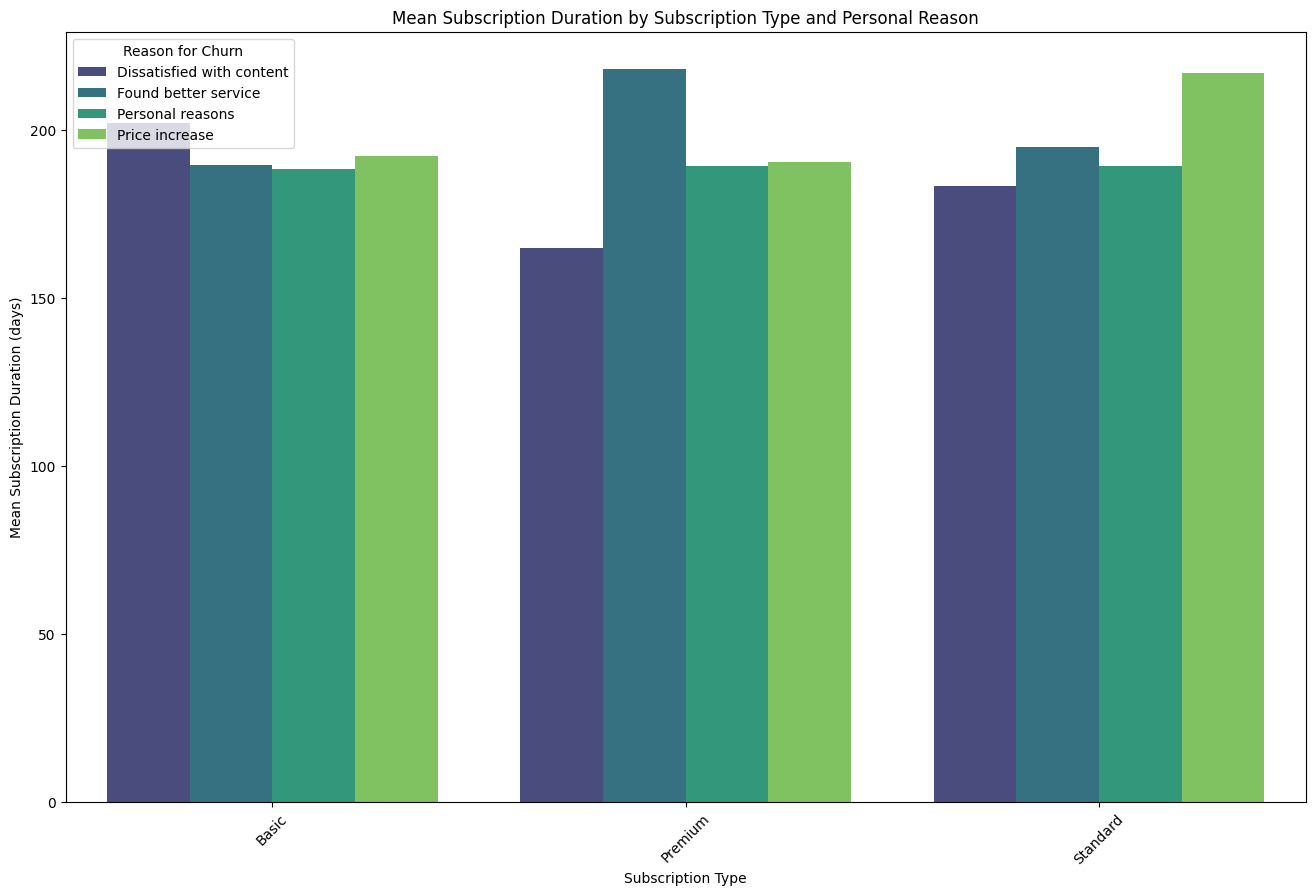

In [129]:
# Calculate the mean subscription duration by subscription type and personal reason
duration_by_type_and_reason = df.groupby(['Subscription_Type', 'Reason_for_Churn'])['Subscription_Duration'].mean().reset_index()
# Plot the mean subscription duration by subscription type and personal reason
plt.figure(figsize=(16, 10))
sns.barplot(x='Subscription_Type', y='Subscription_Duration', hue='Reason_for_Churn', data=duration_by_type_and_reason, palette='viridis')
plt.title('Mean Subscription Duration by Subscription Type and Personal Reason')
plt.xlabel('Subscription Type')
plt.ylabel('Mean Subscription Duration (days)')
plt.xticks(rotation=45)
plt.legend(title='Reason for Churn')
plt.show()



Average Churn Rate: 24.60%
  Subscription_Type   Churned
0             Basic  0.264493
1           Premium  0.252577
2          Standard  0.233962


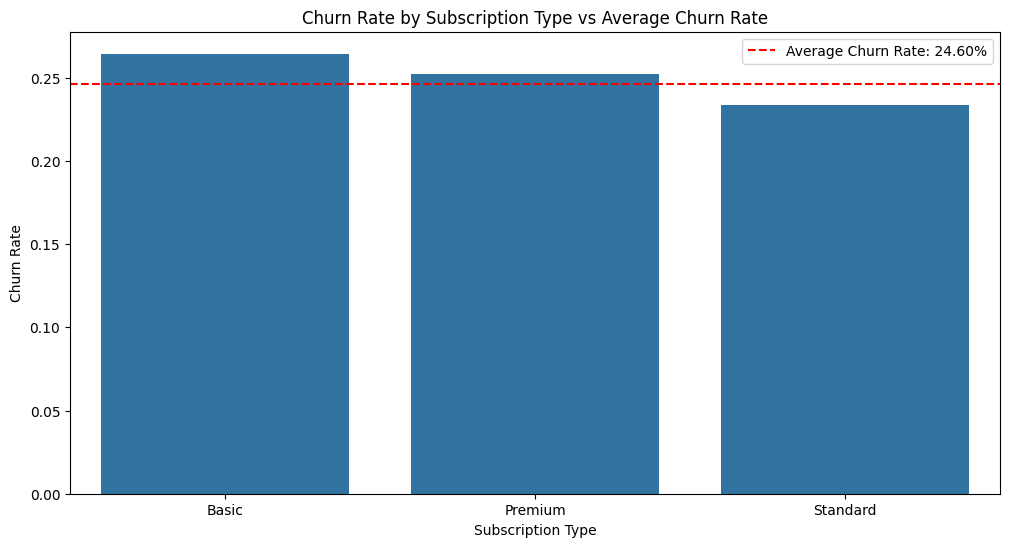

In [130]:
# Calculate average churn rate
average_churn_rate = df['Churned'].mean()

# Calculate churn rate by subscription type
churn_rate_by_subscription = df.groupby('Subscription_Type')['Churned'].mean().reset_index()

# Print out the average churn rate
print(f'Average Churn Rate: {average_churn_rate:.2%}')

# Print out the churn rate by subscription type
print(churn_rate_by_subscription)

# Add average churn rate to the DataFrame for plotting
churn_rate_by_subscription['Average'] = average_churn_rate

# Plot the churn rate by subscription type with the average churn rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Subscription_Type', y='Churned', data=churn_rate_by_subscription)
plt.axhline(y=average_churn_rate, color='r', linestyle='--', label=f'Average Churn Rate: {average_churn_rate:.2%}')
plt.title('Churn Rate by Subscription Type vs Average Churn Rate')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.legend()
plt.show()

In [24]:
gender_distribution = df['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_distribution)



Gender Distribution:
Gender
Other     336
Male      334
Female    330
Name: count, dtype: int64


In [26]:
# Calculate churn rate by rating given
churn_rate_by_rating = df.groupby('Rating_Given')['Churned'].mean()
print(churn_rate_by_rating)

Rating_Given
1    0.303665
2    0.330189
3    0.309783
4    0.178218
5    0.118483
Name: Churned, dtype: float64


Churn Rate by Gender:
   Gender   Churned
0  Female  0.257576
1    Male  0.224551
2   Other  0.255952


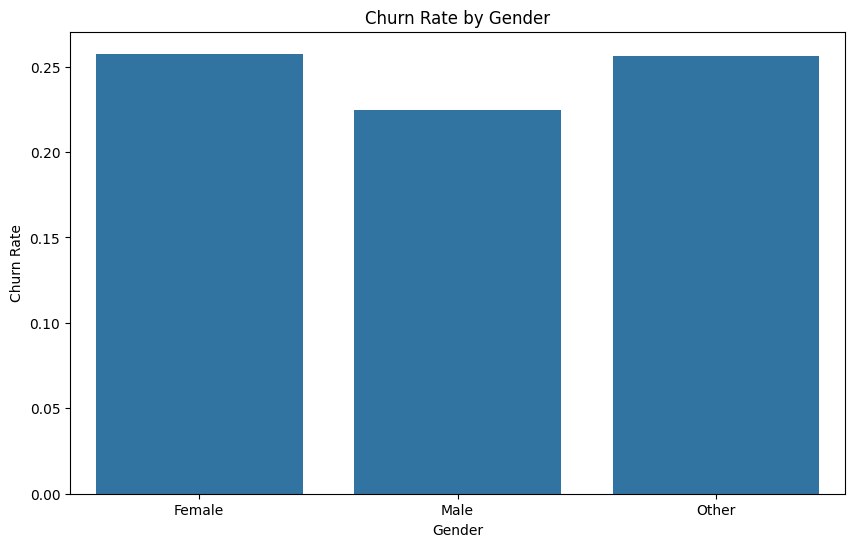

In [137]:
# Calculate the churn rate by gender
churn_rate_by_gender = df.groupby('Gender')['Churned'].mean().reset_index()

# Print out the results
print("Churn Rate by Gender:")
print(churn_rate_by_gender)

# Plot the churn rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Churned', data=churn_rate_by_gender)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

Count of Each Genre by Gender:
   Favorite_Genre  Gender  Count
0          Action  Female     66
1          Action    Male     68
2          Action   Other     71
3          Comedy  Female     72
4          Comedy    Male     64
5          Comedy   Other     67
6     Documentary  Female     61
7     Documentary    Male     62
8     Documentary   Other     65
9           Drama  Female     62
10          Drama    Male     72
11          Drama   Other     78
12         Sci-Fi  Female     69
13         Sci-Fi    Male     68
14         Sci-Fi   Other     55


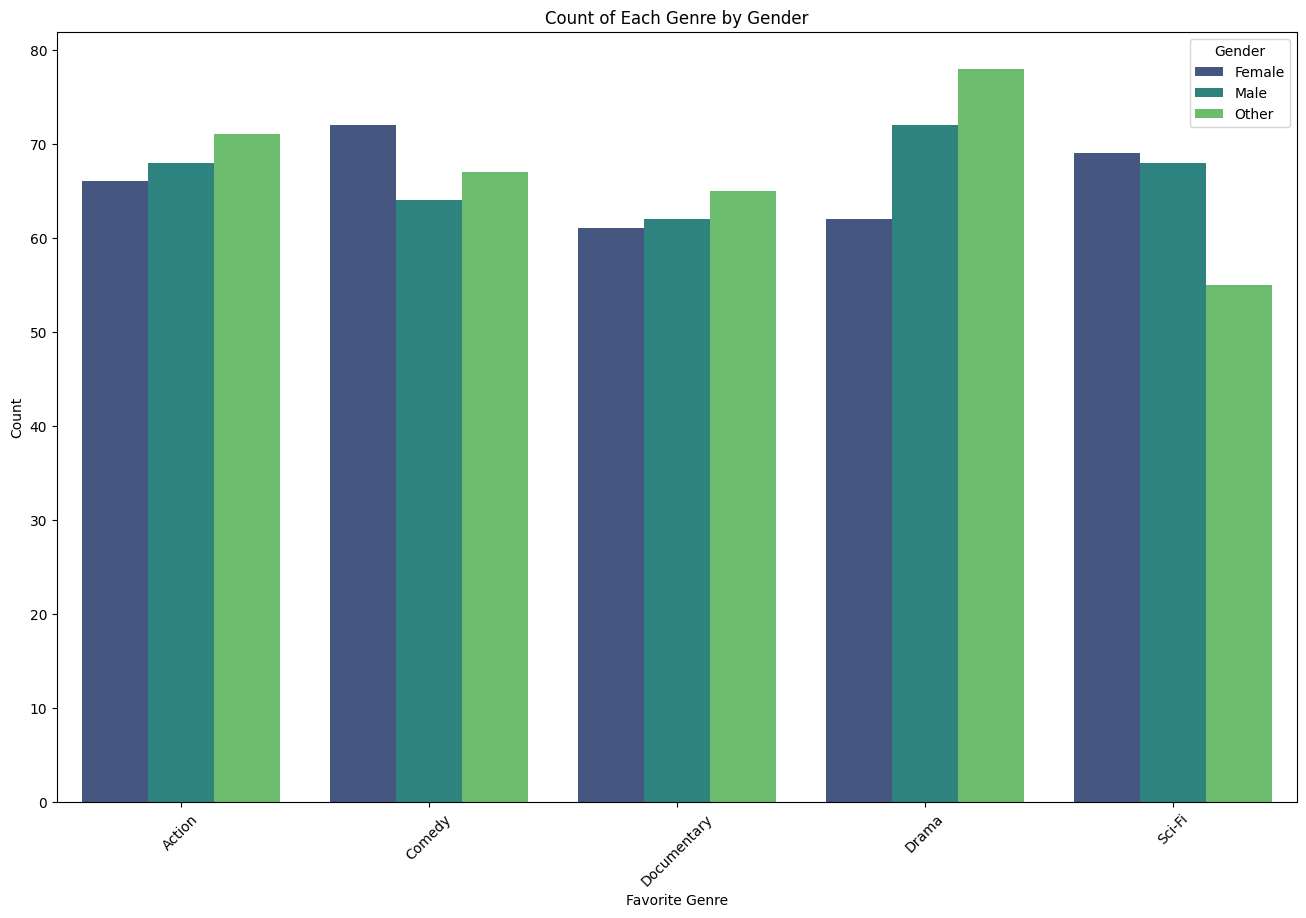

In [134]:
# Calculate the count of each genre by gender
genre_by_gender = df.groupby(['Favorite_Genre', 'Gender']).size().reset_index(name='Count')

# Print out the results
print("Count of Each Genre by Gender:")
print(genre_by_gender)
# Plot the count of each genre by gender
plt.figure(figsize=(16, 10))-
sns.barplot(x='Favorite_Genre', y='Count', hue='Gender', data=genre_by_gender, palette='viridis')
plt.title('Count of Each Genre by Gender')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Average Rating Given by Gender:
   Gender  Rating_Given
0  Female      2.960606
1    Male      3.077844
2   Other      3.050595


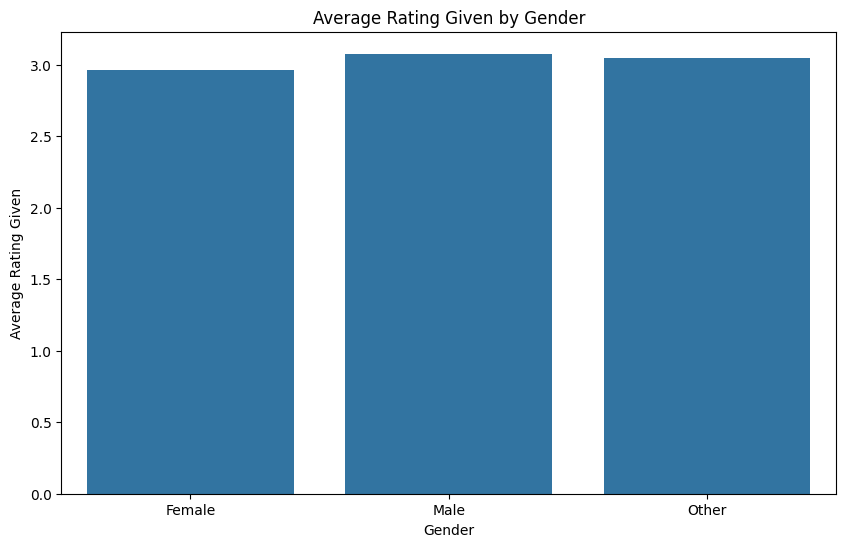

In [138]:
# Calculate the mean rating given by gender
ratings_by_gender = df.groupby('Gender')['Rating_Given'].mean().reset_index()

# Print out the results
print("Average Rating Given by Gender:")
print(ratings_by_gender)

# Plot the average rating given by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Rating_Given', data=ratings_by_gender)
plt.title('Average Rating Given by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating Given')
plt.show()

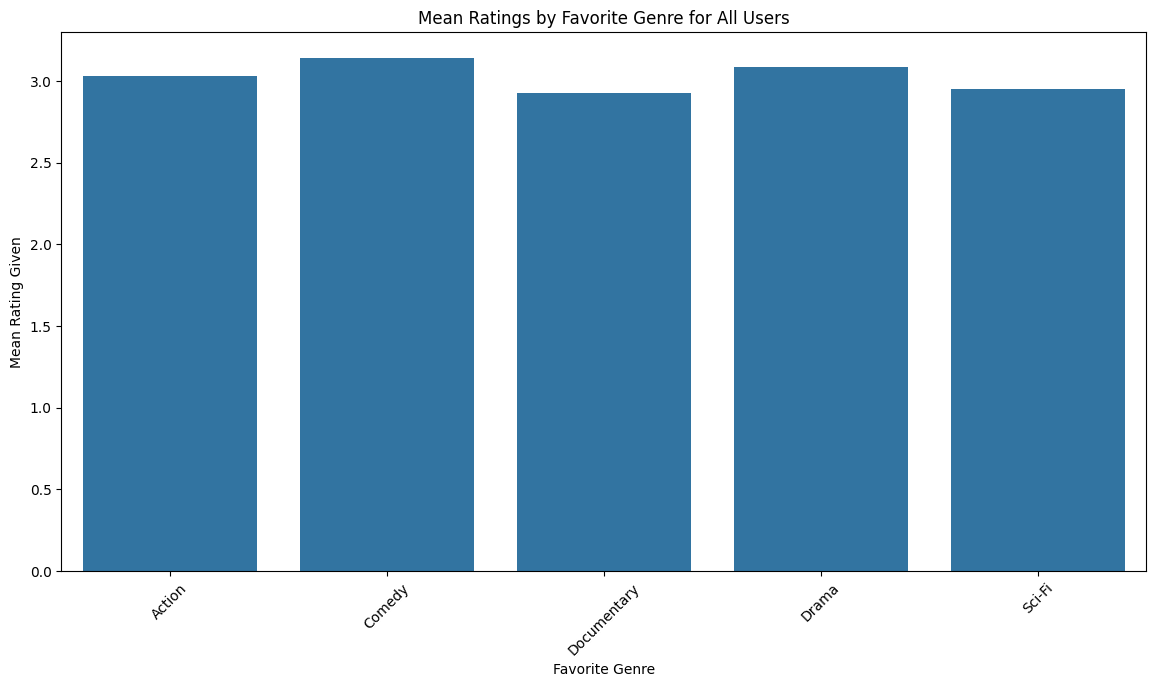

In [81]:
#==================================================================================================
# Calculate mean ratings for each genre for all users
mean_ratings_all_users = df.groupby('Favorite_Genre')['Rating_Given'].mean().reset_index()

# Plot the mean ratings for each genre
plt.figure(figsize=(14, 7))
sns.barplot(data=mean_ratings_all_users, x='Favorite_Genre', y='Rating_Given')
plt.title('Mean Ratings by Favorite Genre for All Users')
plt.xlabel('Favorite Genre')
plt.ylabel('Mean Rating Given')
plt.xticks(rotation=45)
plt.show()

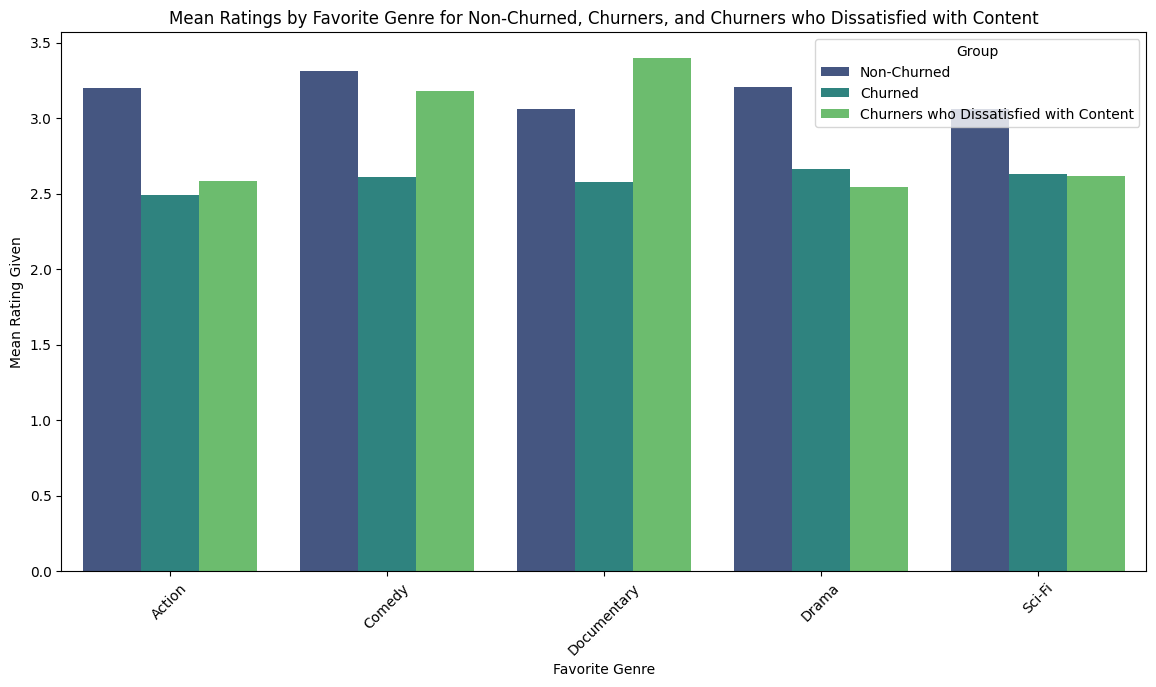

In [83]:

# Calculate mean ratings for churned users
churned_mean_ratings = df.loc[df['Churned'] == 1].groupby('Favorite_Genre')['Rating_Given'].mean().reset_index()
churned_mean_ratings['Group'] = 'Churned'

# Calculate mean ratings for non-churned users
non_churned_mean_ratings = df.loc[df['Churned'] != 1].groupby('Favorite_Genre')['Rating_Given'].mean().reset_index()
non_churned_mean_ratings['Group'] = 'Non-Churned'

# Calculate mean ratings for churned users dissatisfied with content
dissatisfied_mean_ratings = df.loc[(df['Churned'] == 1) & (df['Reason_for_Churn'] == 'Dissatisfied with content')].groupby('Favorite_Genre')['Rating_Given'].mean().reset_index()
dissatisfied_mean_ratings['Group'] = 'Churners who Dissatisfied with Content'

# Combine the three dataframes
combined_mean_ratings = pd.concat([non_churned_mean_ratings, churned_mean_ratings, dissatisfied_mean_ratings])

# Convert the Group column to a categorical type with specified order
combined_mean_ratings['Group'] = pd.Categorical(combined_mean_ratings['Group'], categories=['Non-Churned', 'Churned', 'Churners who Dissatisfied with Content'], ordered=True)

# Plot the combined mean ratings
plt.figure(figsize=(14, 7))
sns.barplot(data=combined_mean_ratings, x='Favorite_Genre', y='Rating_Given', hue='Group', palette="viridis")
plt.title('Mean Ratings by Favorite Genre for Non-Churned, Churners, and Churners who Dissatisfied with Content')
plt.xlabel('Favorite Genre')
plt.ylabel('Mean Rating Given')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.show()

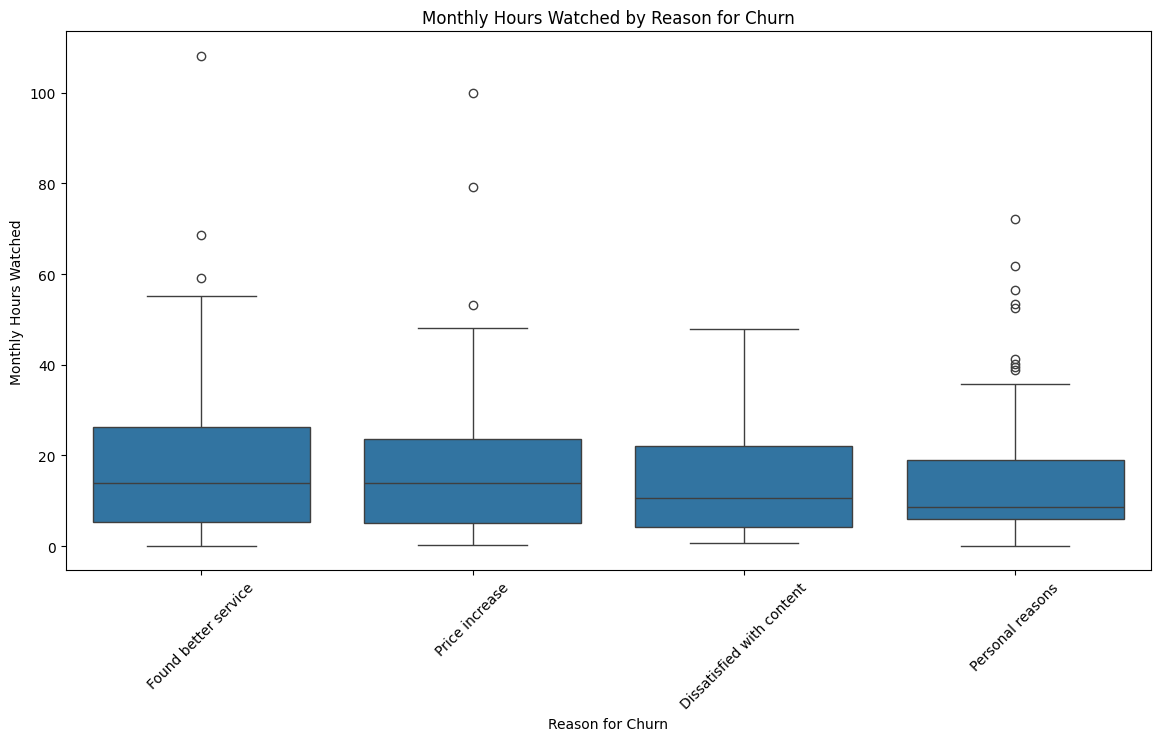

In [70]:
# Filter the data to include only churned users
churned_data = df[df['Churned'] == 1]

# Plot the distribution of monthly hours watched by reason for churn
plt.figure(figsize=(14, 7))
sns.boxplot(data=churned_data, x='Reason_for_Churn', y='Monthly_Hours_Watched')
plt.title('Monthly Hours Watched by Reason for Churn')
plt.xlabel('Reason for Churn')
plt.ylabel('Monthly Hours Watched')
plt.xticks(rotation=45)
plt.show()


In [79]:
# Calculate descriptive statistics for Monthly Hours Watched by Reason for Churn
monthly_hours_by_reason = churned_data.groupby('Reason_for_Churn')['Monthly_Hours_Watched'].describe()

# Print out the results
print(monthly_hours_by_reason)

                           count       mean        std       min       25%  \
Reason_for_Churn                                                             
Dissatisfied with content   52.0  13.831534  11.949756  0.587429  4.122623   
Found better service        64.0  19.552152  20.103876  0.041574  5.356559   
Personal reasons            62.0  16.305344  16.863734  0.074186  5.984238   
Price increase              68.0  17.797802  17.990171  0.191784  5.193524   

                                 50%        75%         max  
Reason_for_Churn                                             
Dissatisfied with content  10.659414  22.198123   47.908356  
Found better service       13.957816  26.386618  108.122364  
Personal reasons            8.584657  19.019460   72.086136  
Price increase             13.896114  23.603935  100.009333  


In [78]:
# Calculate the mean monthly hours watched
mean_monthly_hours = df['Monthly_Hours_Watched'].mean()

# Create a DataFrame for the mean value
mean_df = pd.DataFrame({'Mean Monthly Hours Watched': [mean_monthly_hours]})

# Print out the mean monthly hours watched
print(f'Mean Monthly Hours Watched by All Users: {mean_monthly_hours}')

Mean Monthly Hours Watched by All Users: 19.071653204449373


                           count       mean        std       min       25%  \
Reason_for_Churn                                                             
Dissatisfied with content   52.0  13.831534  11.949756  0.587429  4.122623   
Found better service        64.0  19.552152  20.103876  0.041574  5.356559   
Personal reasons            62.0  16.305344  16.863734  0.074186  5.984238   
Price increase              68.0  17.797802  17.990171  0.191784  5.193524   

                                 50%        75%         max  
Reason_for_Churn                                             
Dissatisfied with content  10.659414  22.198123   47.908356  
Found better service       13.957816  26.386618  108.122364  
Personal reasons            8.584657  19.019460   72.086136  
Price increase             13.896114  23.603935  100.009333  


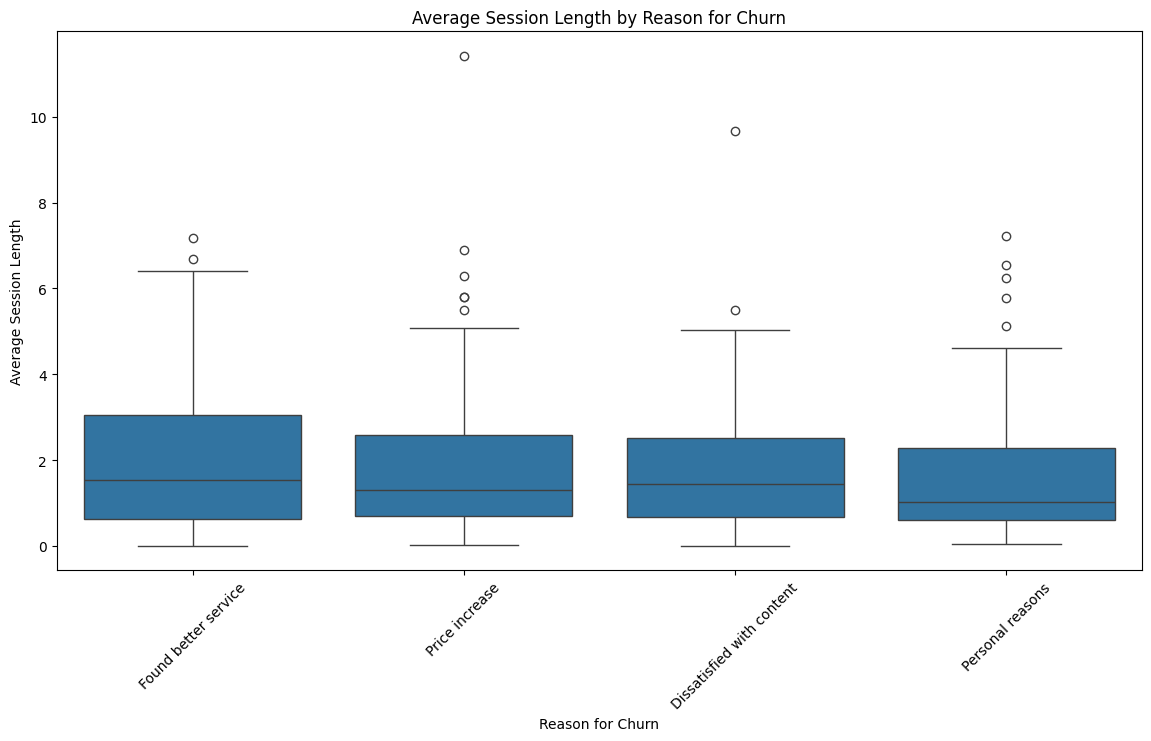

In [80]:
# Calculate descriptive statistics for Monthly Hours Watched by Reason for Churn
monthly_hours_by_reason = churned_data.groupby('Reason_for_Churn')['Monthly_Hours_Watched'].describe()

# Print out the results
print(monthly_hours_by_reason)

# Plot the average session length by reason for churn
plt.figure(figsize=(14, 7))
sns.boxplot(data=churned_data, x='Reason_for_Churn', y='Average_Session_Length')
plt.title('Average Session Length by Reason for Churn')
plt.xlabel('Reason for Churn')
plt.ylabel('Average Session Length')
plt.xticks(rotation=45)
plt.show()


In [38]:
#=========================================================================================================
df.groupby(['Reason_for_Churn', 'Subscription_Type'])['Subscription_Type'].describe()

count unique       top freq
Reason_for_Churn          Subscription_Type                            
Dissatisfied with content Basic                21      1     Basic   21
                          Premium               8      1   Premium    8
                          Standard             23      1  Standard   23
Found better service      Basic                16      1     Basic   16
                          Premium              11      1   Premium   11
                          Standard             37      1  Standard   37
Personal reasons          Basic                21      1     Basic   21
                          Premium              12      1   Premium   12
                          Standard             29      1  Standard   29
Price increase            Basic                15      1     Basic   15
                          Premium              18      1   Premium   18
                          Standard             35      1  Standard   35